# Importing required Libraries


In [ ]:
import numpy as np
import pandas as pd
import random
import math

url = "https://raw.githubusercontent.com/Shreesh90/IML_Assignments/master/A2/HousingPrice.csv"

df = pd.read_csv(url)

Price = df['price']
FloorArea = df['lotsize']
NoOfBedrooms = df['bedrooms']
NoOfBathrooms = df['bathrms']

## Feature scaling on FloorArea

In [ ]:
# FLOOR AREA HAS HIGH VARIANCE SO IT IS IMPORTANT TO SCALE THIS FEATURE
FloorAreaMean = np.mean(FloorArea)
FloorAreaMin = min(FloorArea)
FloorAreaMax = max(FloorArea)
FloorAreaScaled = (FloorArea - FloorAreaMean)/(FloorAreaMax - FloorAreaMin)
FloorArea, FloorAreaScaled

(0      5850
 1      4000
 2      3060
 3      6650
 4      6360
        ... 
 541    4800
 542    6000
 543    6000
 544    6000
 545    6000
 Name: lotsize, Length: 546, dtype: int64, 0      0.048092
 1     -0.079056
 2     -0.143661
 3      0.103075
 4      0.083143
          ...   
 541   -0.024073
 542    0.058401
 543    0.058401
 544    0.058401
 545    0.058401
 Name: lotsize, Length: 546, dtype: float64)

## Creating useful variables

In [ ]:
n, m = df.shape
n, m

(546, 13)

In [ ]:
n_train = math.floor(n * 0.70)
n_test = n - n_train
n_train, n_test

(382, 164)

In [ ]:
col = [1] * n
data_scaling = list(zip(col,FloorAreaScaled,NoOfBedrooms,NoOfBathrooms))
len(data_scaling)

546

In [ ]:
# X_train, Y_train, X_test, Y_test with scaling
X_train = np.array(data_scaling[:n_train])
Y_train = np.array(Price[:n_train])

X_test = np.array(data_scaling[n_train+1:])
Y_test = np.array(Price[n_train+1:])

In [ ]:
X_train.shape

(382, 4)

## Function to find slope

In [ ]:
# THIS FUNCTION FINDS SLOPE i.e. dJ/dw TO BE PUT IN EQUATION
def Slope(theta, X_train, Y_train):
    slope = np.zeros(theta.shape)
    for i in range(len(X_train)):
        itr = 0
        for j in range(theta.shape[1]):
            itr = itr + theta[0][j] * X_train[i][j]
        slope += (itr - Y_train[i]) * X_train[i]
    return slope


# Using batch gradient without regularisation

In [ ]:
# LEARNING RATE
lr = 0.001 

# INITIAL WEIGHTS
theta = np.zeros((1,4))
theta

array([[0., 0., 0., 0.]])

In [ ]:
# GRADIENT DESCENT ALGORITHM FOR BATCH GDA
for i in range(5000):
    theta = theta - (lr/n_train)*Slope(theta,X_train,Y_train)
theta

array([[ 7645.16561033,  7527.93232483, 10966.99872425, 18651.19085438]])

In [ ]:
theta = theta.reshape((4,1))
theta.shape

(4, 1)

In [ ]:
# PREDICTING THE VALUES ON X_test USING THE NEW WEIGHTS theta
Y_pred = np.dot(X_test, theta)
error = 0
for i in range(n_test-1):
    error += abs((Y_test[i] - Y_pred[i][0])/Y_test[i])
error /= n_test
print("MEAN ABSOLUTE PERCENTAGE ERROR: ")
float(error*100)

MEAN ABSOLUTE PERCENTAGE ERROR: 


20.342942821184607

# Using batch gradient with regularisation

In [ ]:
lr = 0.001
Lambda = -120
theta = np.zeros((1,4))
theta

array([[0., 0., 0., 0.]])

In [ ]:
# GRADIENT DESCENT ALGORITHM
for epochs in range(5000):
    cof = 1 - ((lr*Lambda)/n_train)
    theta = cof*theta - (lr/n_train)*Slope(theta, X_train,Y_train)
theta

array([[ 24215.51544333,  68899.24737921, -10707.49254687,
         58818.33628204]])

In [ ]:
theta = theta.reshape((4,1))
theta.shape

(4, 1)

In [ ]:
theta

array([[ 24215.51544333],
       [ 68899.24737921],
       [-10707.49254687],
       [ 58818.33628204]])

In [ ]:
# PREDICTING THE VALUES ON X_test USING THE NEW WEIGHTS theta

Y_pred = np.dot(X_test, theta)
error = 0
for i in range(n_test-1):
    error += abs((Y_test[i] - Y_pred[i])/Y_test[i])
error = error/n_test

print("MEAN ABSOLUTE PERCENTAGE ERROR: ")
float(error*100)

MEAN ABSOLUTE PERCENTAGE ERROR: 


26.331464731636085

# Lambda vs Batch Gradient Descent with regularization

In [ ]:
lamdas = [-100,-110,-120, -130, -140]
errors = []


for Lambda in lamdas:
  theta = np.zeros((1,4))

  # GRADIENT DESCENT ALGORITHM
  for epochs in range(5000):
      cof = 1 - ((lr*Lambda)/n_train)
      theta = cof*theta - (lr/n_train)*Slope(theta, X_train,Y_train)
  # PREDICTING THE VALUES ON X_test USING THE NEW WEIGHTS theta
  theta = theta.reshape((4,1))
  Y_pred = np.dot(X_test, theta)
  error = 0
  for i in range(n_test-1):
      error += abs((Y_test[i] - Y_pred[i])/Y_test[i])
  error = error/n_test
  errors.append(float(error*100))
  print(f"Error with Lambda {Lambda} is {float(error*100)}")

Error with Lambda -100 is 18.98049534029176
Error with Lambda -110 is 18.918288188014984
Error with Lambda -120 is 18.92124816522627
Error with Lambda -130 is 18.97497435400053
Error with Lambda -140 is 19.063146694245418


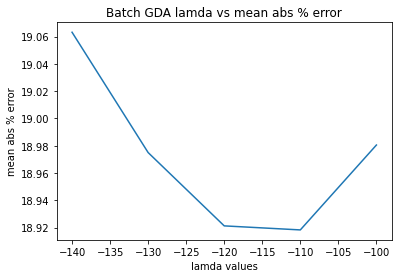

In [ ]:
import matplotlib.pyplot as plt
plt.plot(lamdas,errors)
plt.xlabel("lamda values")
plt.ylabel("mean abs % error")
plt.title("Batch GDA lamda vs mean abs % error")
plt.show()

# Using Stochastic gradient without regularisation.

In [ ]:
# FUNCTION TO FIND SLOPE FOR STOCHASTIC DESCENT
def SlopeStoch(theta, X_train, Y, ind):
	itr = 0
	for j in range(theta.shape[1]):
		itr = itr + theta[0][j]*X_train[ind][j]
	return (itr - Y) * X_train[ind]


In [ ]:
lr = 0.0005
theta = np.zeros((1,4))
theta

array([[0., 0., 0., 0.]])

In [ ]:
# GRADIENT DESCENT ALGORITHM
for iter in range(10):
    for i in range(X_train.shape[0]):
        theta = theta - (lr)*SlopeStoch(theta, X_train, Y_train[i], i)
theta

array([[ 7010.38219526,  2740.10071648, 15349.70780109, 13593.29892176]])

In [ ]:
theta = theta.reshape((4,1))
theta.shape

(4, 1)

In [ ]:
# PREDICTING THE VALUES ON X_test USING THE NEW WEIGHTS theta

Y_pred = np.dot(X_test, theta)
error = 0
for i in range(n_test-1):
    error += abs((Y_test[i] - Y_pred[i])) / Y_test[i]
error = error/n_test

print("MEAN ABSOLUTE PERCENTAGE ERROR: ")
float(error*100)

MEAN ABSOLUTE PERCENTAGE ERROR: 


19.423526436438767

# Using Stochastic gradient with Regularization

In [ ]:
lr = 0.0005
Lambda = -30
theta = np.zeros((1,4))
theta

array([[0., 0., 0., 0.]])

In [ ]:
# GRADIENT DESCENT ALGORITHM
for itr in range(10):
  for i in range(X_train.shape[0]):
    cof = 1-((Lambda*lr)/n_train)
    theta = cof*theta - lr*(SlopeStoch(theta, X_train, Y_train[i], i))
theta

array([[ 7145.04049021,  2941.69365658, 15243.24581134, 14035.54161393]])

In [ ]:
theta = theta.reshape((4,1))
theta.shape

(4, 1)

In [ ]:
# PREDICTING THE VALUES ON X_test USING THE NEW WEIGHTS theta

Y_pred = np.dot(X_test, theta)
error = 0
for i in range(n_test-1):
    error += abs((Y_test[i] - Y_pred[i])) / Y_test[i]
error = error/n_test

print("MEAN ABSOLUTE PERCENTAGE ERROR: ")
float(error*100)

MEAN ABSOLUTE PERCENTAGE ERROR: 


19.299850024980504

# Lambda vs Stochastic Gradient Descent with regularization


In [ ]:
lamdas = [-10,-20,-30, -40, -50]
errors = []


for Lambda in lamdas:
  theta = np.zeros((1,4))

  # GRADIENT DESCENT ALGORITHM
  for itr in range(10):
    for i in range(X_train.shape[0]):
      cof = 1-((Lambda*lr)/n_train)
      theta = cof*theta - lr*(SlopeStoch(theta, X_train, Y_train[i], i))

  # PREDICTING THE VALUES ON X_test USING THE NEW WEIGHTS theta
  theta = theta.reshape((4,1))
  Y_pred = np.dot(X_test, theta)
  error = 0
  for i in range(n_test-1):
      error += abs((Y_test[i] - Y_pred[i])/Y_test[i])
  error = error/n_test
  errors.append(float(error*100))
  print(f"Error with Lambda {Lambda} is {float(error*100)}")

Error with Lambda -10 is 20.77802810995078
Error with Lambda -20 is 20.7328187584684
Error with Lambda -30 is 20.689629884914453
Error with Lambda -40 is 20.64637027487252
Error with Lambda -50 is 20.602877692418346


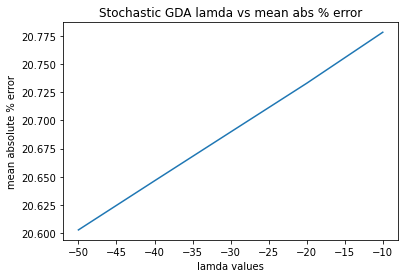

In [ ]:
import matplotlib.pyplot as plt
plt.plot(lamdas,errors)
plt.xlabel("lamda values")
plt.ylabel("mean absolute % error")
plt.title("Stochastic GDA lamda vs mean abs % error")
plt.show()

# Using Minibatch gradient without regularisation

In [ ]:
# USEFUL FUNCTIONS FOR MINI BATCH GRADIENT 
def product(w,x):
    ans=0
    for i in range(x.shape[0]):
        ans= ans + w[0][i]*x[i]
    return ans

def gradient(x,w,y,st,bs):
    ans=np.zeros(w.shape)
    for i in range(st,st+bs):
        if(i>=x.shape[0]):
          break
        ans=(ans+(product(w,x[i])-y[i])*x[i])
    return ans


In [ ]:
BatchSize = 20;
lr = 0.0002
theta = np.zeros((1,4))
theta

array([[0., 0., 0., 0.]])

In [ ]:
# GRADIENT DESCENT ALGORITHM
for itr in range(50):
  for i in range(BatchSize):
    theta = theta - (lr*gradient(X_train,theta,Y_train,BatchSize*i,BatchSize))/BatchSize
theta

array([[ 4891.71936057,   221.38545923, 14598.66776056,  7156.34800691]])

In [ ]:
theta = theta.reshape((4,1))
theta.shape

(4, 1)

In [ ]:
# PREDICTING THE VALUES ON X_test USING THE NEW WEIGHTS theta

Y_pred = np.dot(X_test, theta)
error = 0
for i in range(n_test-1):
    error += abs((Y_test[i] - Y_pred[i])/Y_test[i])
error = error/n_test

print("MEAN ABSOLUTE PERCENTAGE ERROR: ")
float(error*100)

MEAN ABSOLUTE PERCENTAGE ERROR: 


25.794843431025104

# Using Minibatch gradient with regularisation

In [ ]:
BatchSize = 20;
lr = 0.0002
Lambda = -20
theta = np.zeros((1,4))
theta

array([[0., 0., 0., 0.]])

In [ ]:
# GRADIENT DESCENT ALGORITHM
for itr in range(50):
  for i in range(BatchSize):
    temp = 1-((Lambda*lr)/BatchSize)
    theta = (temp * theta) - (lr * gradient(X_train, theta, Y_train, BatchSize*i, BatchSize))/ BatchSize

theta

array([[ 5231.20289362,   247.60936576, 15585.22770405,  7672.11402056]])

In [ ]:
theta = theta.reshape((4,1))
theta.shape

(4, 1)

In [ ]:
# PREDICTING THE VALUES ON X_test USING THE NEW WEIGHTS theta

Y_pred = np.dot(X_test, theta)
error = 0
for i in range(n_test-1):
    error += abs((Y_test[i] - Y_pred[i])/Y_test[i])
error = error/n_test

print("MEAN ABSOLUTE PERCENTAGE ERROR: ")
float(error*100)

MEAN ABSOLUTE PERCENTAGE ERROR: 


23.185650124145248

# Lambda vs Mini-Batch Gradient Descent with regularization

In [ ]:
lamdas = [-10,-20,-30, -40, -50]
errors = []


for Lambda in lamdas:
  theta = np.zeros((1,4))

  # GRADIENT DESCENT ALGORITHM
  for itr in range(50):
    for i in range(BatchSize):
      temp = 1-((Lambda*lr)/BatchSize)
      theta = (temp * theta) - (lr * gradient(X_train, theta, Y_train, BatchSize*i, BatchSize))/ BatchSize


  # PREDICTING THE VALUES ON X_test USING THE NEW WEIGHTS theta
  theta = theta.reshape((4,1))
  Y_pred = np.dot(X_test, theta)
  error = 0
  for i in range(n_test-1):
      error += abs((Y_test[i] - Y_pred[i])/Y_test[i])
  error = error/n_test
  errors.append(float(error*100))
  print(f"Error with Lambda {Lambda} is {float(error*100)}")

Error with Lambda -10 is 24.43542456789495
Error with Lambda -20 is 23.185650124145248
Error with Lambda -30 is 22.14076554496143
Error with Lambda -40 is 21.271138715865558
Error with Lambda -50 is 20.686004436509982


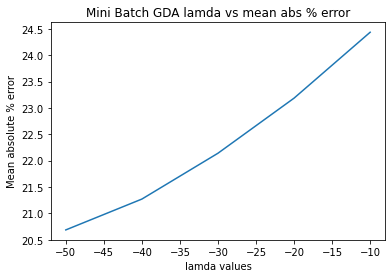

In [ ]:
import matplotlib.pyplot as plt
plt.plot(lamdas,errors)
plt.xlabel("lamda values")
plt.ylabel("Mean absolute % error")
plt.title("Mini Batch GDA lamda vs mean abs % error")
plt.show()